# Network Science Assignment

### Importing libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from os import path, getcwd
from networkx.algorithms import community
import itertools
from pandas import DataFrame

In [2]:
from layout import *

### Read graph from file

In [3]:
graph_file = 'email-Eu-core.txt'
comm_file = "email-Eu-core-department-labels.txt"

In [4]:
G_email = nx.read_edgelist(graph_file,delimiter=" ",nodetype=int)

In [5]:
nx.info(G_email)

'Name: \nType: Graph\nNumber of nodes: 1005\nNumber of edges: 16706\nAverage degree:  33.2458'

### Read ground truth community and prepare a community list

In [6]:
with open(comm_file, 'r') as myfile:
  comm_string = myfile.read()

In [7]:
comm_list = comm_string.split('\n')

In [8]:
#comm_dict tells us the nodes for the corresponding community in the graph
comm_dict = {}
for i in range(42):
  comm_dict[i] = []

for l in comm_list[:-1]:
  comm_dict[int(l.split(" ")[1])].append(int(l.split(" ")[0]))

### Plot function to plot the graphs

In [9]:
def plot(G,par,n_com,labels=False,edge_width=.1,layout=False,title=None):
    degree = []
    nodelist = []
    for (n,d) in G.degree():
        degree.append(d*12)
        nodelist.append(n)
    colors = []
    colors_mod = np.array(list(np.random.choice(range(256), size=3).tolist() for i in range(n_com)))
    colors_mod = colors_mod/256
    for k in par.keys():
        colors.append(colors_mod[par[k]])
    if layout == False:
        pos = None
    else:
        pos = pos = community_layout(G, par)
    plt.figure()
    plt.title(title)
    nx.draw(G,pos,node_color=colors,node_size=degree,nodelist=nodelist,width=edge_width,alpha=.6,with_labels=labels)
    plt.show()

### Plotting graph for ground truth communities and calculating modularity for the same

/home/shivam/gitRepos/network-science/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


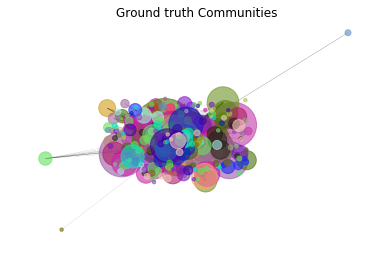

In [10]:
#Ground truth communities
n_comm = len(comm_dict) #Finding uni comm we have 42 here

#partition dict : maps int node -> int community
par = {}
for k in comm_dict.keys():
  for l in comm_dict[k]:
    par[l] = k

#plot the graph
plot(G_email,par,n_comm,layout=True,title="Ground truth Communities")

#original community list: contains a list of nodes(having community i) at index i
orig_comm_list = list([] for i in range(n_comm)) #list for unique num of comm
for k in par.keys():
  orig_comm_list[par[k]].append(k)

#calculate modularity
modularity_original = community.modularity(G_email, orig_comm_list)

### Finding communities using greedy modularity algo and then calculate the modularity for same 

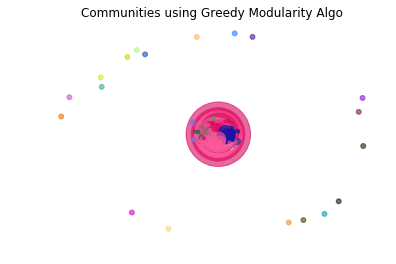

In [11]:
#Finding comm. using modularity algo
comm_m =list(community.greedy_modularity_communities(G_email))

#number of communitites
n_comm_m= len(comm_m)

comm_list_m = []
for i in range(len(comm_m)):
    for n in comm_m[i]:
             comm_list_m.append([n, i])
comm_sorted_m = np.array(sorted(comm_list_m))

#partition dict : maps int node -> int community
par_m = {}
for l in comm_sorted_m:
    par_m[l[0]] = l[1]

#plot the graph
plot(G_email,par_m,n_comm_m,edge_width=1,title="Communities using Greedy Modularity Algo")

#calculate modularity
modularity_mod = community.modularity(G_email, comm_m)

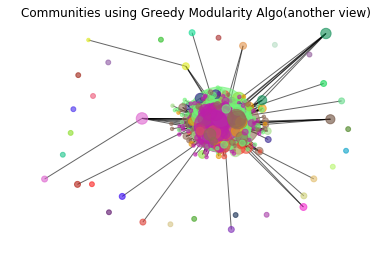

In [12]:
#plot with a different positioning for nodes
plot(G_email,par_m,n_comm_m,edge_width=1,layout=True,title="Communities using Greedy Modularity Algo(another view)")

### Finding communities using divisive algo and calculating modularity for the same

In [ ]:
#Finding comm using divisive algo
comm_gen = community.girvan_newman(G_email)
limited = itertools.takewhile(lambda c: len(c) <= 42, comm_gen)
lvl_comm = []
for comms in limited:
    lvl_comm.append(list(frozenset(sorted(c)) for c in comms))
comm_n = lvl_comm[-1]

#number of communitites
n_comm_n = len(comm_n)

comm_list_n = []
for i in range(n_comm_n):
     for node in comm_n[i]:
             comm_list_n.append([node, i])
comm_sorted_n = np.array(sorted(comm_list_n))

#partition dict : maps int node -> int community
par_newman = {}
for l in comm_sorted_n:
    par_newman[l[0]] = l[1]

#plot the graph
plot(G_email,par_newman,n_comm_n,edge_width=1,title="Communities using Divisive Algo")

plot(G_email,par_newman,n_comm_n,layout=True,title="Communities using Divisive Algo(another view)")

#calculate modularity
modularity_newman = community.modularity(G_email, comm_n)

In [13]:
#pip install PrettyTable
from prettytable import PrettyTable
t = PrettyTable(['Method', 'Communities count', 'Modularity Val.'])
t.add_row(['Ground Truth', n_comm, modularity_original])
t.add_row(['Modularity Based', n_comm_m, modularity_mod])
t.add_row(['Divisive Based', n_comm_n, modularity_newman])

In [ ]:
print(t)